# Identifying Iris species

**Group members**

&emsp;&emsp;Erika Delorme, Arthur Lee, Rachel Lee, and Sharon Wang 

**Introduction**

[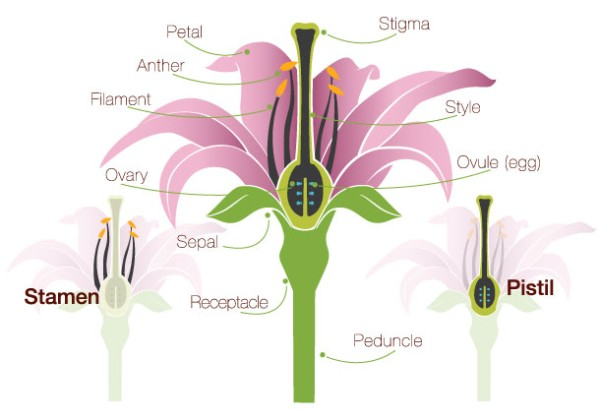](https://www.proflowers.com/blog/flower-anatomy)&emsp;&emsp;Irises are flowers that are generally blue or purple, with outstretched petals and sepals. Worldwide, the Iris genus contains approximately 300 species, from large bearded to dwarf irises. Sepals are the part of the flower that covers the outside of the bud and protects the flower before it blossoms. Petals are modified leaves that attract pollinators and protect reproductive organs. Petals and sepals are both important components of the anatomy of irises. 

&emsp;&emsp;Our data set includes three different species of irises: Iris Setosa, Iris Versicolor, and Iris Virginica. The Iris Setosa, also referred to as the Beachhead Iris, is purple-blue, usually of very dark shade, but occasionally pale lavender. Its leaves are sword-like and they are most often found in marshes, shores, and meadows. The Iris Versicolor, also known as the Blue Flag, is blue-purple in color, has blue-green and sword-shaped leaves, and is often found around ponds, lakes, and streams. The Iris Virginica, also called the Southern Blue Flag, is a violet-blue aquatic flower with dense sword-shaped, vivid green leaves, and is often found in water gardens, ponds, and streams. 

**Question**

&emsp;&emsp;Given the sepal length, sepal width, petal length, and petal width, which species of Iris (Setosa, Versicolour, or Virginica) does the Iris plant belong to?

**Description**

&emsp;&emsp;The data set that we are using for our project is the Iris Data Set from the UCI Machine Learning Repository. There are 3 types of Iris species being observed in this dataset: Iris Setosa, Iris Versicolor, and Iris Virginica. The four attributes about each type of iris flower are the sepal length, sepal width, petal length, and petal width, all in cm. Using these four attributes, we believe we can predict the type of Iris species. 

**Method**

***Reading data***

&emsp;&emsp;1. In order to read in our data set into Jupyter, we first read the following packages: 
library(tidyverse), library(repr), library(tidymodels), library(GGally), and library(caret). 

In [36]:
library(tidyverse)
library(repr)
library(tidymodels)
library(GGally)
library(caret)

&emsp;&emsp;2. We read our data set, iris.data. We then mutate the class column from a character to a factor, which will facilitate the process of splitting. To do this, we use the function as_factor, which will convert the class column into a factor, as shown below:

In [37]:
options(repr.plot.width = 6, repr.plot.height = 6)
set.seed(500)
iris=read_csv('data/iris.data')%>%
    mutate(class=as_factor(class))

Parsed with column specification:
cols(
  sepalL = col_double(),
  sepalW = col_double(),
  petalL = col_double(),
  petalW = col_double(),
  class = col_character()
)



&emsp;&emsp; This is what our original iris data set looks like: 

In [38]:
iris 

sepalL,sepalW,petalL,petalW,class
<dbl>,<dbl>,<dbl>,<dbl>,<fct>
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa
5.4,3.9,1.7,0.4,Iris-setosa
4.6,3.4,1.4,0.3,Iris-setosa
5.0,3.4,1.5,0.2,Iris-setosa
4.4,2.9,1.4,0.2,Iris-setosa


***Splitting data***

&emsp;&emsp; 3. We then split our data into two sets: iris_train and iris_test. The iris_train set comprises 75% of our original data set, and will be used to train our classification model. The remaining 25% of our original data is set to iris_test, which we will later use to test the accuracy of our model at predicting the class variable, which represents the type of Iris species.

In [39]:
iris_split <- initial_split(iris, prop = 0.75, strata = class)  
iris_train <- training(iris_split)   
iris_test <- testing(iris_split)

***Summarizing our data*** 

&emsp;&emsp;4. Afterwards, we created a summary of the data set that we thought would be relevant for exploratory data analysis we would do later on. We created a summary table of the number of observations for each Iris species by using the function group_by and specifying the class column, which told R that we only want the class column (of the Iris species). We also use the summarize() function and specify the count = n(), which will give us the number of counts for each Iris species. 

In [40]:
species_count <- iris_train %>% group_by(class) %>% summarize(count = n())

`summarise()` ungrouping output (override with `.groups` argument)



|Species | Number of observations|
| --- | --- |
| Iris-setosa | 38 |
| Iris-versicolor | 38 |
| Iris-virginica | 38 |

***Visualizing the data set***

&emsp;&emsp;5. We then created a scatterplot as our visualizations that we thought would be useful for our exploratory data analysis using the function ggpairs. 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



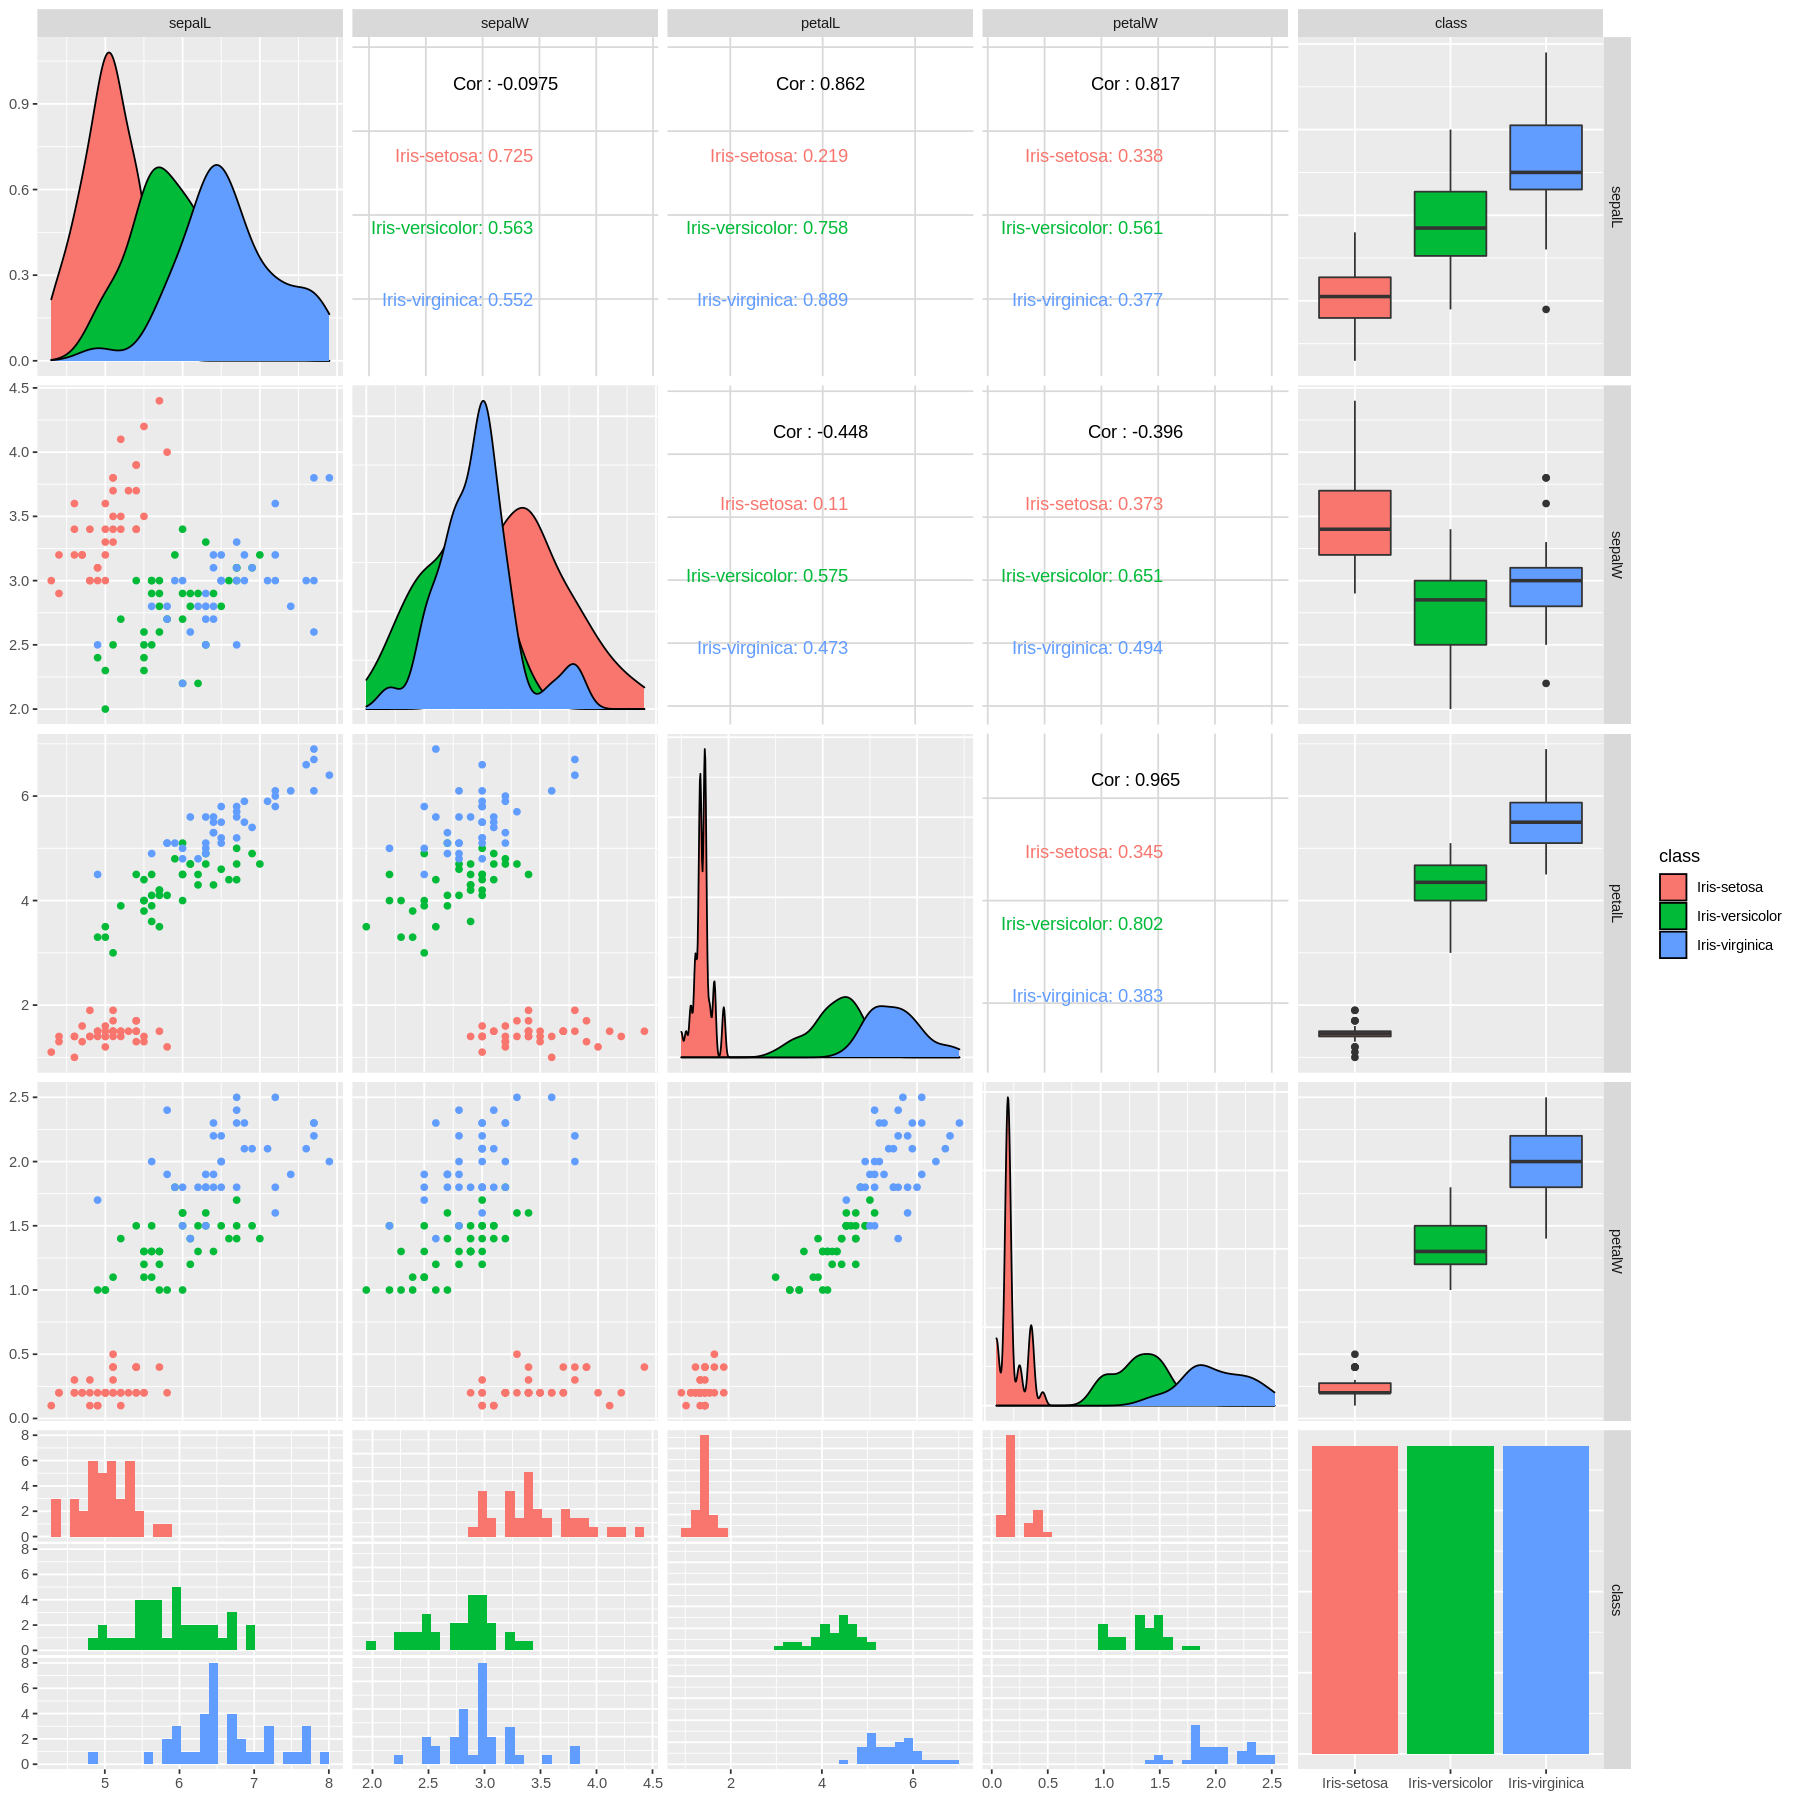

In [41]:
options(repr.plot.width = 15, repr.plot.height = 15)
iris_plot <- iris_train %>%
  ggpairs(legend = 1, columns = 1:5, mapping = ggplot2::aes(color = class))
iris_plot

***Cross-validation***

&emsp;&emsp;6. We then let our training data undergo cross-validation. Instead of using random splitting, we can use a more structured process to split the data. By using the vfold_cv function, we ensure that each observation in our data set is used only once per validation set. When we use vfold_cv, we first specify the data set, iris_train. Then, we specify that we want to use 5 folds by writing v = 5. Lastly, the strata argument is made equal to class, the variable we are trying to predict. 

In [42]:
iris_vfold <- vfold_cv(iris_train, v = 5, strata = class)

***Using recipe***

&emsp;&emsp;7. Our recipe will use all our variables (indicated by the “~.” in the recipe function) as known predictors to predict an unknown Iris specimen (“class” in the recipe function) using the iris_train data set (“data = iris_train”). By using the step_scale and step_center functions on all our predictors, we ensure they all have a mean of 0 and a standard deviation of 1. 

In [43]:
iris_recipe <- recipe(class ~., data = iris_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

***Model specification*** 

&emsp;&emsp;8. The next step includes creating a model specification for K-nearest neighbours classification using the nearest_neighbor function. Within this function, the weight_func function allows us to specify “rectangular” which causes each of the K observations to have only 1 vote. The neighbours function lets us state the number of neighbors for the K classification, but in our case we use the function tune() from the tidymodels package collection to make sure that each parameter of our model is tuned. The function set_engine specifies that we want to use the k-nn engine as our computational engine. Lastly, the set_mode helps us specify classification as our classification problem. 

In [44]:
knn_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) %>%
  set_engine("kknn") %>%
  set_mode("classification")

&emsp;&emsp;9. Next, we create a tibble data frame, containing a single column titled “neighbors” with values 1 through 20 (1:20 takes all the numbers between 1 and 20 inclusive) using the function tibble(). We called this object gridvals. 

In [45]:
gridvals <- tibble(neighbors = 1:20)

***Using workflow***

&emsp;&emsp;10. We then put all the previous steps together using the function workflow(). The add_recipe function states the recipe we want to use, iris_recipe. The add_model function defines the model we want to use, knn_tune. The function tune_grid fits the model for each value in a range of parameter values. The resamples argument specifies our cross-validation result and grid argument specifies that we want to use the object gridvals, so only values between 1 and 20 of the number of neighbours K when tuning. The last function, collect_metrics, collects the mean and the standard error, a measure of the uncertainty of the mean value, of the classifier’s validation accuracy across the folds.

In [46]:
knn_results <- workflow() %>%
  add_recipe(iris_recipe) %>%
  add_model(knn_tune)%>%
  tune_grid(resamples = iris_vfold, grid = gridvals) %>%
  collect_metrics()
knn_results

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9059524,5,0.027561516,Model01
1,roc_auc,hand_till,0.9294643,5,0.020671137,Model01
2,accuracy,multiclass,0.9059524,5,0.027561516,Model02
2,roc_auc,hand_till,0.9455038,5,0.020949481,Model02
3,accuracy,multiclass,0.9238095,5,0.027303202,Model03
3,roc_auc,hand_till,0.9706739,5,0.012871936,Model03
4,accuracy,multiclass,0.9238095,5,0.027303202,Model04
4,roc_auc,hand_till,0.9899872,5,0.003046936,Model04
5,accuracy,multiclass,0.9142857,5,0.026459656,Model05


***Checking accuracy*** 

&emsp;&emsp;11. This next step involves checking the accuracy of our model, so far, using the filter function. We are relying on accuracy to give us information about how accurate our model is. 

In [47]:
accuracies <- knn_results %>% 
      filter(.metric == "accuracy")
accuracies

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,multiclass,0.9059524,5,0.02756152,Model01
2,accuracy,multiclass,0.9059524,5,0.02756152,Model02
3,accuracy,multiclass,0.9238095,5,0.02730320,Model03
4,accuracy,multiclass,0.9238095,5,0.02730320,Model04
5,accuracy,multiclass,0.9142857,5,0.02645966,Model05
6,accuracy,multiclass,0.9142857,5,0.02645966,Model06
7,accuracy,multiclass,0.9238095,5,0.02730320,Model07
8,accuracy,multiclass,0.9238095,5,0.02730320,Model08
9,accuracy,multiclass,0.9488095,5,0.02032544,Model09


&emsp;&emsp;12. We then plot a graph of the accuracy against the K values using the function ggplot. 

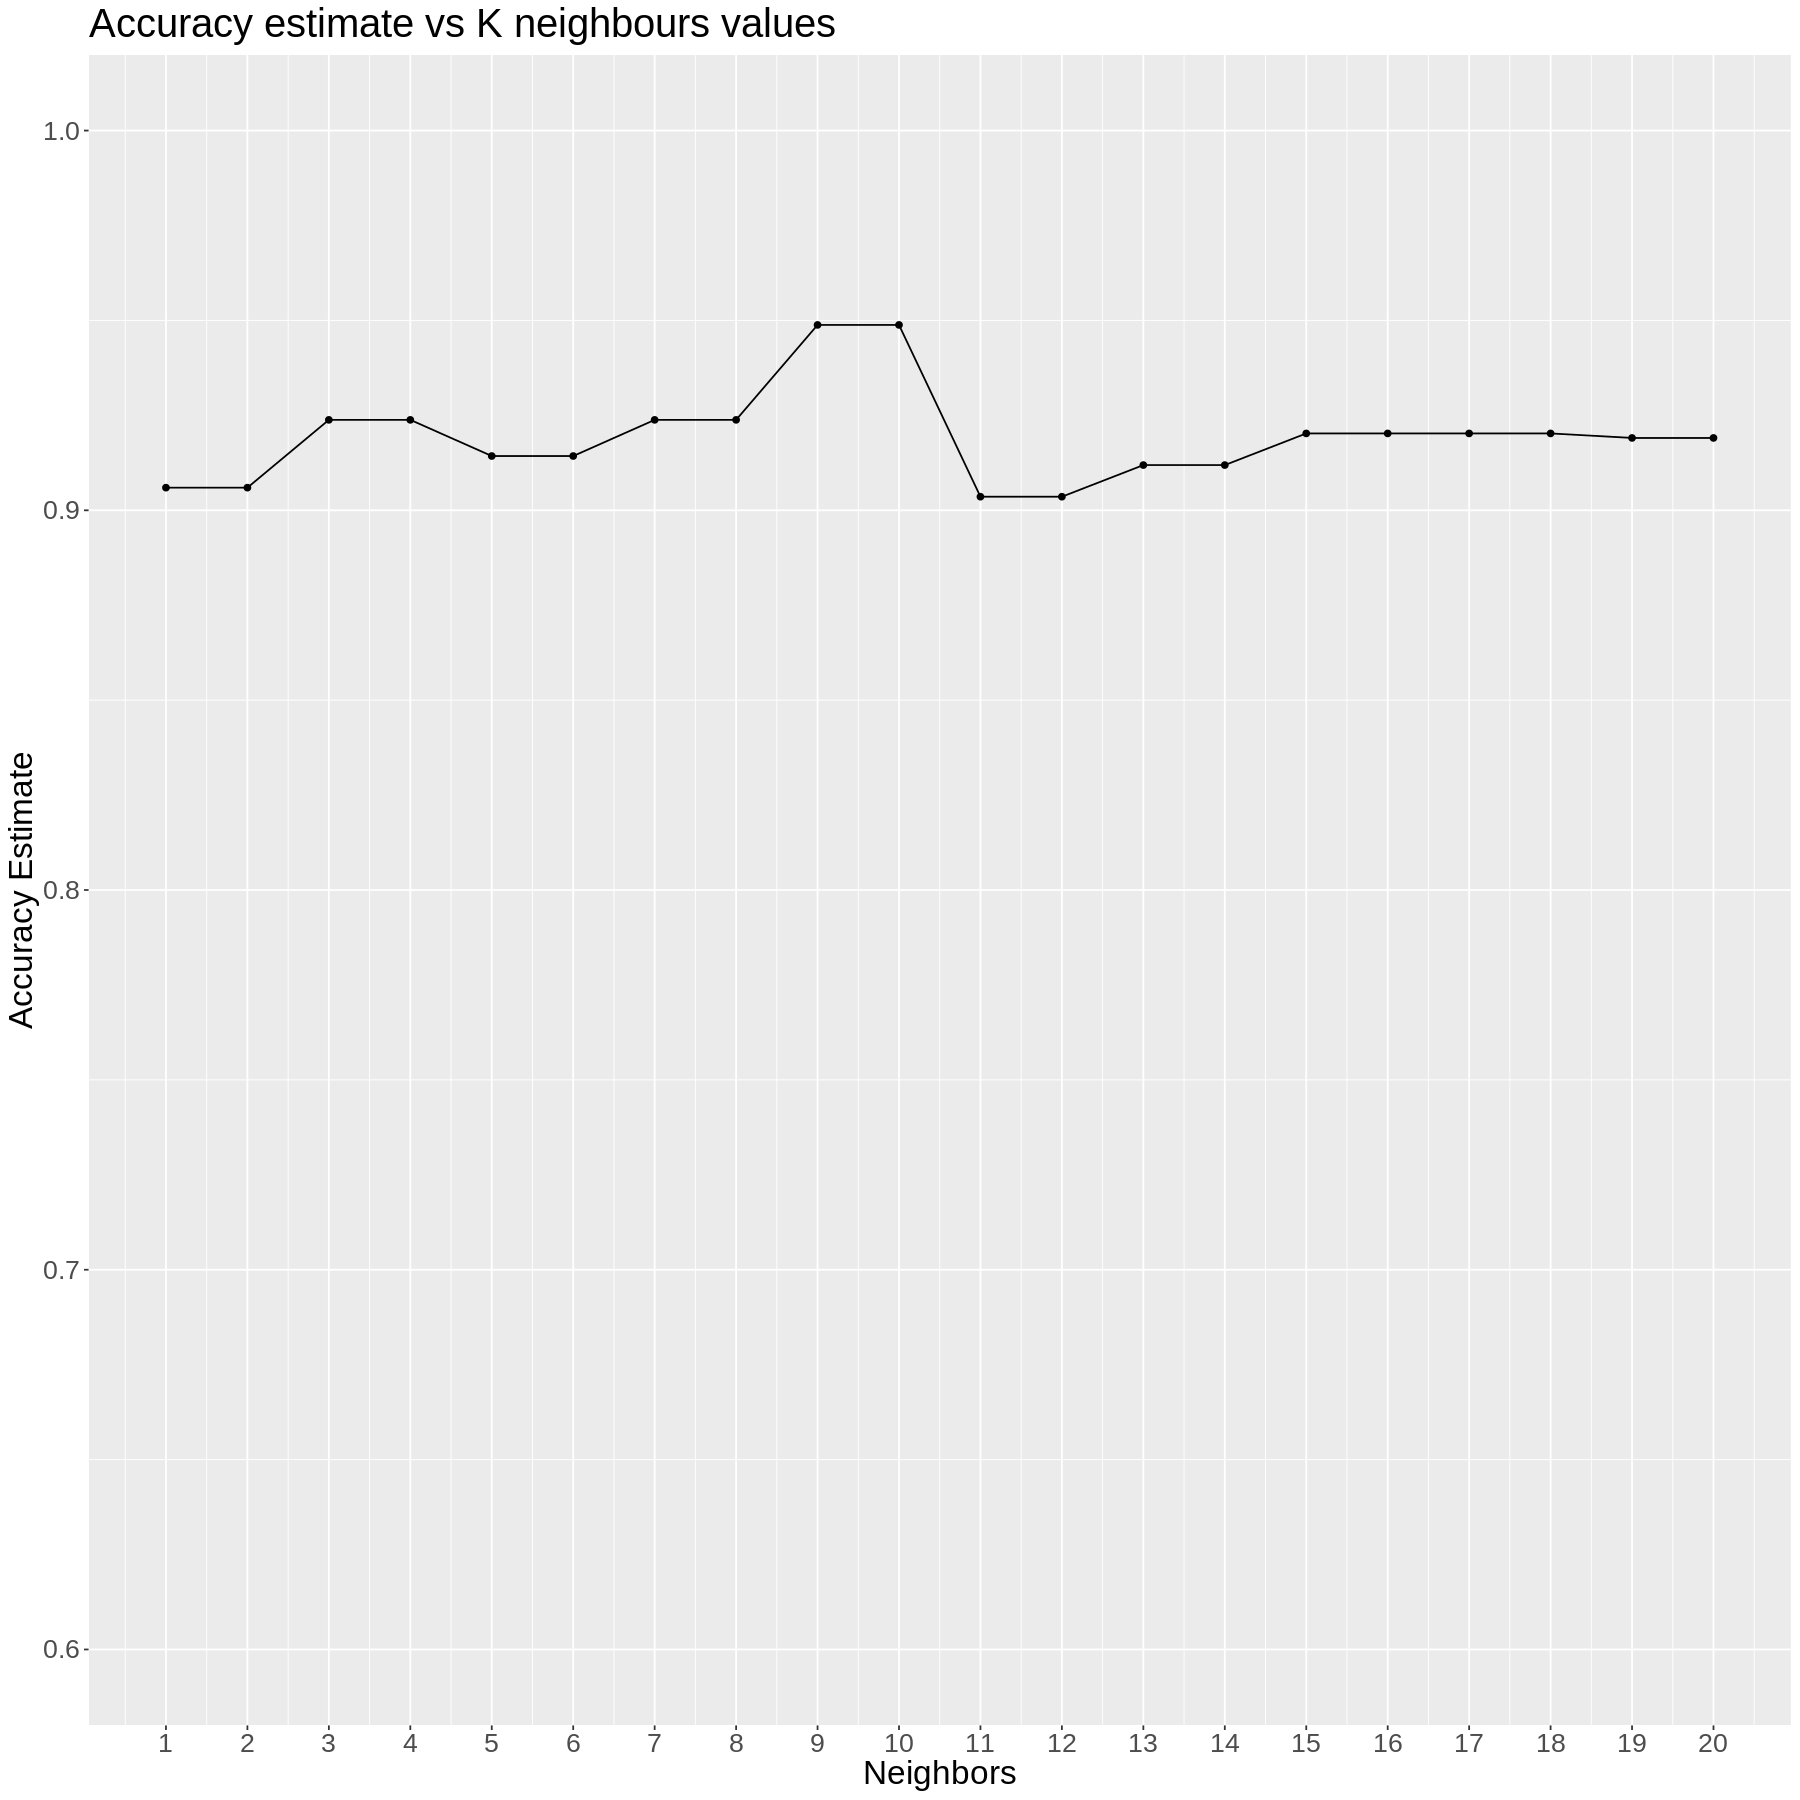

In [48]:
accuracy_versus_k <- ggplot(accuracies, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 20, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.6, 1.0)) + # adjusting the y-axis
      ggtitle("Accuracy estimate vs K neighbours values") + 
      theme(text = element_text(size = 20))
accuracy_versus_k

***New model specification***

&emsp;&emsp;13. After plotting the accuracy with K, we now know that the value of K that gives us the most precision is K = 10. Therefore, we create a new model specification for K-nearest neighbours classification. This time, instead of using the argument tune(), we specify in the argument neighbors that we wish for 10 values of K to be used. 


In [49]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) %>%
  set_engine("kknn") %>%
  set_mode("classification")

***New workflow*** 

&emsp;&emsp;14. Because we have made a new model specification, we will now adjust and make a new workflow, in which we keep the same iris_recipe, but specify that we want to use knn_spec as our model. At this point, we are still using the training data. 

In [50]:
iris_best_fit <- workflow()%>%
  add_recipe(iris_recipe) %>%
  add_model(knn_spec) %>%
  fit(iris_train)

***Summary prediction table***

&emsp;&emsp;15. Finally, using the K-nearest neighbour classifier object, we can predict class label for our testing data set. The function predict() is used to predict. The function bind_cols adds the column of predictions to our original test data. The metrics function allows us to verify the accuracy of our classifier. We specify for the truth argument our class column and the estimate argument with the .pred_class column.

In [51]:
iris_summary <- iris_best_fit %>%
          predict(iris_test) %>%
          bind_cols(iris_test) %>%
          metrics(truth = class, estimate = .pred_class)
iris_summary

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,multiclass,1
kap,multiclass,1


***Visualizing the analysis***

&emsp;&emsp; 16. Our accuracy level was determined to be 1, which is very accurate. Since our analysis includes 4 variables, it’s impossible for us to visualize the decision plots with all variables. Therefore, we visualize boundary plots for both sepal and petal separately to see the classification based on only two variables. In other words, we will redo Knn classification, but for one, we will use only sepal length and sepal width as the predictors, and we will do the same thing using petal length and petal width.
Below, we can see the analysis using K-nearest neighbour using predictors sepal length and sepal width first. The steps here are the same as step 7, 13, and 14. 

In [52]:
iris_recipe <- recipe(class ~ sepalL + sepalW, data = iris_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) %>%
  set_engine("kknn") %>%
  set_mode("classification")

iris_best_fit <- workflow()%>%
  add_recipe(iris_recipe) %>%
  add_model(knn_spec) %>%
  fit(iris_train)

&emsp;&emsp; 17. Next, we want to create a boundary plot or coloured prediction map plots. The point of doing this is to produce a grid of the new observations. To do this, we first use seq function to create the grid of sepal length and sepal width. Secondly, we use the expand.grid function to arrange the grid in a data frame.

In [53]:
sepal_L_seq <- seq(from = min(iris_train$sepalL), to = max(iris_train$sepalL), length.out = 114)
sepal_W_seq <- seq(from = min(iris_train$sepalW), to = max(iris_train$sepalW), length.out = 114)

grid_points <- expand.grid(sepalL = sepal_L_seq,
                           sepalW = sepal_W_seq)

&emsp;&emsp; 18. Then, we want to predict the class labels of grid points using the fit workflow we made in step 16. For the prediction, we use the predict function. We also use the cbind function to combine the columns together. 

In [54]:
grid_predicted <- iris_best_fit %>%
                    predict(new_data = grid_points) %>%
                    cbind(grid_points)

&emsp;&emsp; 19. Finally, we make the actual visualization of the predictions with a coloured scatter and a very high transparency (low alpha value) and large point radius. We use the ggplot function to make the scatterplot, but we also specify in the geom_point function the alpha argument, setting it at 0.3, which will allow for high transparency and better see the individual grid points. 

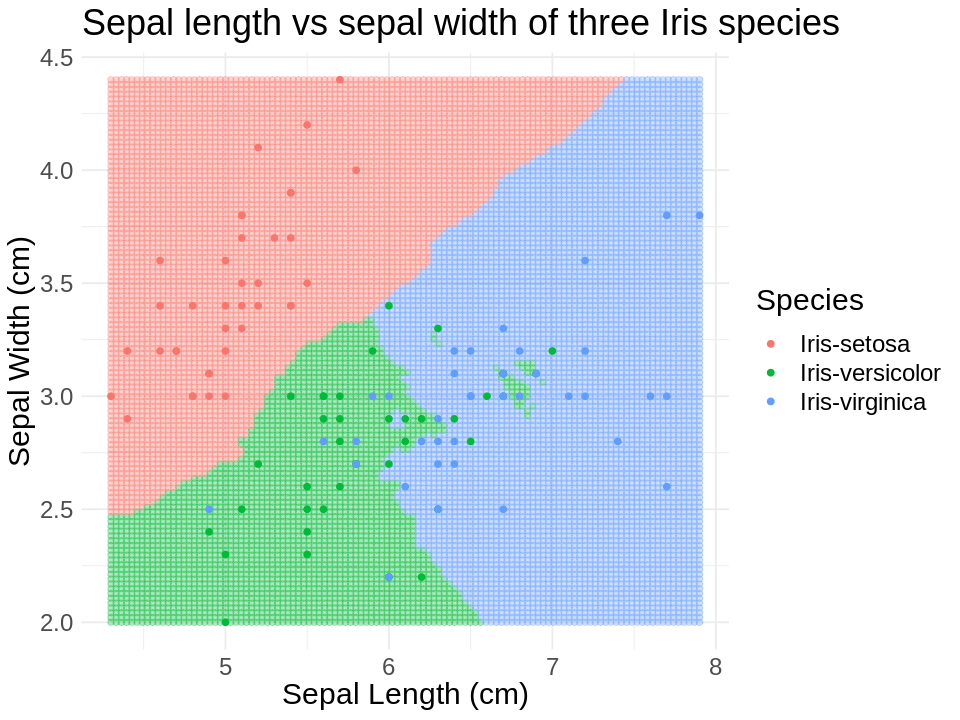

In [55]:
set.seed(5000)
options(repr.plot.width = 8, repr.plot.height = 6)

grid_predicted_sepal_plot <- grid_predicted %>%
    ggplot(aes(x = sepalL, 
               y = sepalW, 
               color = .pred_class)) + 
    geom_point(alpha = 0.3) + 
    geom_point(data = iris_train,
               aes(x = sepalL, 
                   y = sepalW, 
                   color = class)) + 
    theme_minimal() + 
    labs(x="Sepal Length (cm)", y="Sepal Width (cm)", color="Species") + 
    ggtitle("Sepal length vs sepal width of three Iris species") + 
    theme(text = element_text(size = 18)) 
grid_predicted_sepal_plot  

&emsp;&emsp; 20. Here, we repeat the step 16 to step 19, but the only difference is that we are using petal length and petal width as the predictors of the type of Iris species. 

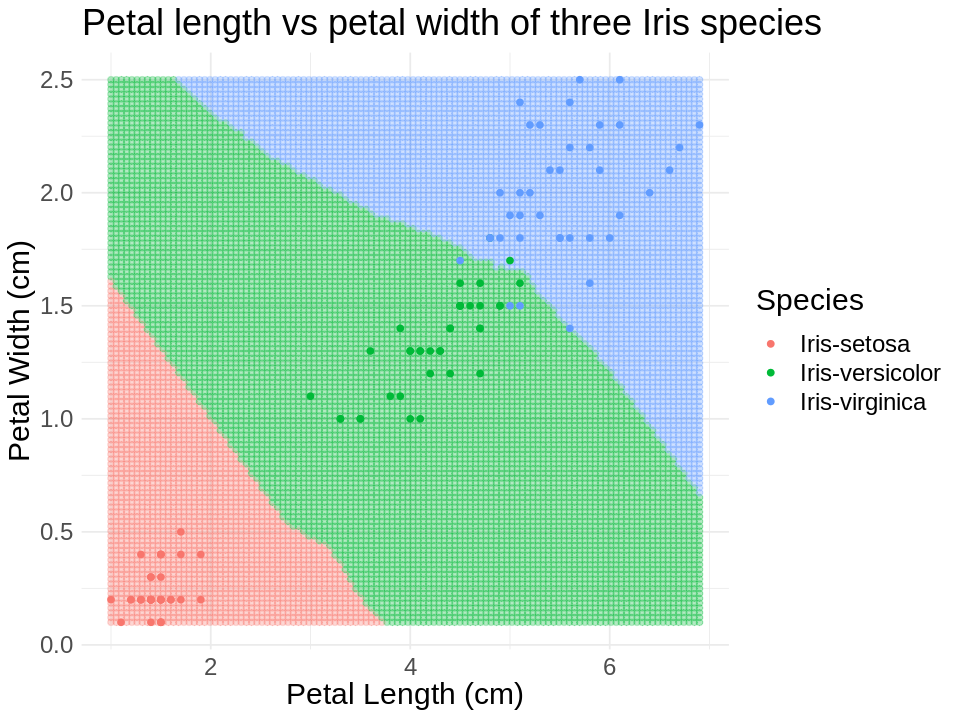

In [56]:
iris_recipe <- recipe(class ~ petalL + petalW, data = iris_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 10) %>%
  set_engine("kknn") %>%
  set_mode("classification")

iris_best_fit <- workflow()%>%
  add_recipe(iris_recipe) %>%
  add_model(knn_spec) %>%
  fit(iris_train)

petal_L_seq <- seq(from = min(iris_train$petalL), to = max(iris_train$petalL), length.out = 114)
petal_W_seq <- seq(from = min(iris_train$petalW), to = max(iris_train$petalW), length.out = 114)

grid_points <- expand.grid(petalL = petal_L_seq,
                           petalW = petal_W_seq)

grid_predicted <- iris_best_fit %>%
                    predict(new_data = grid_points) %>%
                    cbind(grid_points)

options(repr.plot.width = 8, repr.plot.height = 6)

grid_predicted_petal_plot <- grid_predicted %>%
    ggplot(aes(x = petalL, 
               y = petalW, 
               color = .pred_class)) + 
    geom_point(alpha = 0.3) + 
    geom_point(data = iris_train,
               aes(x = petalL, 
                   y = petalW, 
                   color = class)) + 
    theme_minimal() + 
    labs(x="Petal Length (cm)", y="Petal Width (cm)", color="Species") + 
    ggtitle("Petal length vs petal width of three Iris species") + 
    theme(text = element_text(size = 18)) 
grid_predicted_petal_plot 

**Discussion**

***Summary of results*** 

&emsp;&emsp; From our two boundary plots (sepal width with sepal length, petal width with petal length), we can see that Iris Setosa is accurately predicted as it does not have any points that are misclassified. On the other hand, Iris Versicolor and Iris Virginica were not completely accurately predicted because there are many points, especially in the border graph with the sepal width and sepal length, that are misclassified. For example, a point that is in the blue area with majority Iris Virginica is sometimes seen as being green for Iris versicolour, which is a model prediction mistake. From those two boundary plots, we can see petal is a better indicator than sepal is.

***Expectations*** 

&emsp;&emsp; We did not specifically know what to expect from our data analysis thus we cannot say what this is what we expected to find. One thing that we did not expect is for our model to be completely accurate. Our accuracy was found to be 1 and usually it is quite difficult to achieve a very accurate model. Supporting the accuracy of our model, all the points of Iris Setosa were accurately predicted. But, we still had some points misclassified between the Iris Versicolour and Iris Virginica, which is a little unexpected given the accuracy of the model. 

***Impact of our findings***

&emsp;&emsp; Since the accuracy of our analysis is 1, it indicates that sepal and petal are fairly accurate indicators of Iris species. Therefore, we can probably try to use these four attributes to predict other Iris species with similar color.


***Potential future questions***

&emsp;&emsp; From our findings, we have developed a few potential future questions: 
1. Are there other characteristics of irises that will yield a higher accuracy while classifying iris species, such as their stems? 
2. Are there characteristics that would indicate that a type of iris is poisonous or safe for consumption? 
3. Are there any relationships between iris characteristics and their use in products such as medicine or essential oils?

**Citations**

&emsp;&emsp;Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 

&emsp;&emsp;Gardenia. (2019). Gardenia.net. https://www.gardenia.net/

&emsp;&emsp;Lady Bird Johnson Wildflower Center | The University of Texas at Austin. (n.d.). Lady Bird Johnson Wildflower Center - The Botanic Garden of Texas. Lady Bird Johnson Wildflower Center; Retrieved March 11, 2021, from https://www.wildflower.org/

&emsp;&emsp;Types of Irises. (2012, September 21). Www.growerdirect.com. https://www.growerdirect.com/types-of-irises

&emsp;&emsp;[Decision plot function](https://michael.hahsler.net/SMU/EMIS7332/R/viz_classifier.html)